In [2]:
import numpy as np
from tqdm import tqdm
from collections import defaultdict
from random import shuffle
env_size = 50

start = np.array([1, 1])
goal = np.array([49, 49])
q = defaultdict(lambda: 0)
buffer = set()
actions = np.array([[-1,0],[0,-1],[0,0],[0,1],[1,0]])

In [3]:
def learn_q():
    listbuffer = list(buffer)
    shuffle(listbuffer)
    for data in listbuffer:
        s, a, s_next, reward, done = data
        if done:
            q[s, a] = q[s, a] + 0.1 * (reward - q[s, a])
        else:
            v_next = max([q[s_next, tuple(a_)] for a_ in actions])
            q[s, a] = q[s, a] + 0.1 * (reward + v_next - q[s, a])

In [4]:
q = defaultdict(lambda: 0)
buffer = set()
reached = 0
for _ in tqdm(range(1000)):
    state = start.copy()
    for _ in range(100):
        if np.random.rand() < 0.1:
            action = actions[np.random.choice(np.arange(len(actions)))]
        else:
            q_values = np.array([q[tuple(state), tuple(a)] for a in actions])
            action = actions[np.random.choice(np.arange(len(actions))[q_values==q_values.max()])]
        state_next = state + action
        state_next = state_next.clip(0, env_size)
        done = (state_next==goal).all()
        reward = np.linalg.norm(state-goal)-np.linalg.norm(state_next-goal)
        buffer.add((tuple(state), tuple(action), tuple(state_next), reward, done))
        state = state_next
        if done:
            reached += 1
            break
    learn_q()
    
reached

100%|██████████| 1000/1000 [00:20<00:00, 49.81it/s]


34

In [5]:
# optional
from copy import deepcopy
q = defaultdict(lambda: 0)
for _ in range(1000):
    learn_q()

In [ ]:
xs = np.arange(11)
ys = np.arange(11)
xx, yy = np.meshgrid(xs, ys)

value = []
for x, y in zip(xx.reshape(-1), yy.reshape(-1)):
    value.append(np.array([q[(x, y), tuple(a)] for a in actions]).max())
    
import ipympl
%matplotlib widget
import matplotlib.pyplot as plt

plt.clf()
plt.cla()
plt.close('all')

value = np.array(value).reshape(xx.shape)
fig, ax = plt.subplots()
im = ax.imshow(value)

# Loop over data dimensions and create text annotations.
for i in xs:
    for j in ys:
        text = ax.text(j, i, '%.1f' % value[i,j], ha="center", va="center", color="w")

fig.tight_layout()
plt.show()

In [ ]:
# # penalize the other actions if the current action is optimal
# v_max = max([l[s, tuple(a_)] for a_ in actions])
# if (l[s, tuple(a)] == v_max) and (v_next > v_max):
#     for a_ in actions:
#         a_ = tuple(a_)
#         if (l[s, a_] == v_max) and (a != a_):
#             l[s, a_] = l[s, a_] + 0.1 * (l[s, a_] - 0.1 - l[s, a_])

# Learn the Grid-World

In [94]:
import numpy as np
from tqdm import tqdm
from collections import defaultdict
from random import shuffle
env_size = 10

start = np.array([1, 4])
goal = np.array([9, 4])
actions = np.array([[-1,0],[0,-1],[0,0],[0,1],[1,0]])

In [102]:
def learn_l():
    states = list(state2trans.keys())
    shuffle(states)
    for s in states:
        transitions = state2trans[s]
        values = np.array([reward+V[s_next] for s, a, s_next, reward, done in transitions])
        actions = np.array([a for s, a, s_next, reward, done in transitions])
        idx_best = np.random.choice(np.arange(len(values))[values==max(values)])
        a_best = tuple(actions[idx_best])
        for s, a, s_next, reward, done in transitions:
            if done:
                V[s_next] = V[s_next] + 0.1 * (reward - V[s_next])
            # else:
            V[s] = V[s] + 0.1 * (V[s_next]+reward-V[s])                
            if a==a_best:
                L[s, a] = L[s, a] + 0.1 * (max(reward+V[s_next], L[s, a])-L[s, a])
            else:
                L[s, a] = L[s, a] + 0.1 * (min(reward+V[s_next], L[s, a])-L[s, a])
                # V[s_next] = V[s_next] + 0.1 * (max(0.1 + V[s_next], V[s]+reward) - V[s_next])
                # V[s] = V[s] + 0.1 * (min(V[s]-0.1, V[s_next]-reward) - V[s])

In [103]:
L = defaultdict(lambda: 0)
V = defaultdict(lambda: 0)
buffer = set()
state2trans = defaultdict(set)
reached = 0
for _ in tqdm(range(100)):
    state = start.copy()
    for _ in range(100):
        l_values = np.array([L[tuple(state), tuple(a)] for a in actions])
        if np.random.rand() < 0.1:
            action = actions[np.random.choice(np.arange(len(actions)))]
        else:
            action = actions[np.random.choice(np.arange(len(actions))[l_values==l_values.max()])]
        state_next = state + action
        state_next = state_next.clip(0, env_size)
        done = (state_next==goal).all()
        reward = np.linalg.norm(state-goal)-np.linalg.norm(state_next-goal)
        state2trans[tuple(state)].add((tuple(state), tuple(action), tuple(state_next), reward, done))
        buffer.add((tuple(state), tuple(action), tuple(state_next), reward, done))
        state = state_next
        if done:
            reached += 1
            break
    learn_l()

100%|██████████| 100/100 [00:00<00:00, 745.86it/s]


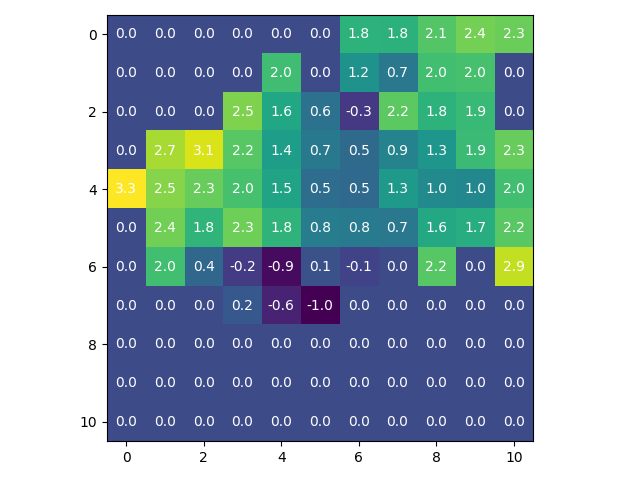

In [105]:
import ipympl
%matplotlib widget
import matplotlib.pyplot as plt

xs = np.arange(11)
ys = np.arange(11)
xx, yy = np.meshgrid(xs, ys)

value = []
for x, y in zip(xx.reshape(-1), yy.reshape(-1)):
    value.append(V[(x, y)])

plt.clf()
plt.cla()
plt.close('all')

value = np.array(value).reshape(xx.shape)
fig, ax = plt.subplots()
im = ax.imshow(value)

# Loop over data dimensions and create text annotations.
for i in xs:
    for j in ys:
        text = ax.text(j, i, '%.1f' % value[i,j], ha="center", va="center", color="w")

fig.tight_layout()
plt.show()

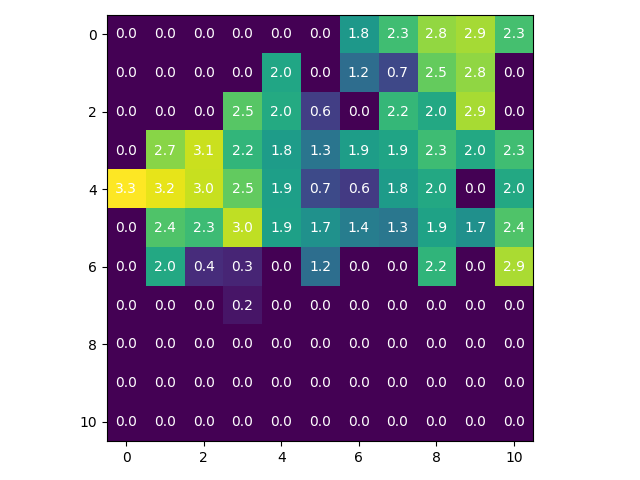

In [106]:
import ipympl
%matplotlib widget
import matplotlib.pyplot as plt

plt.clf()
plt.cla()
plt.close('all')

value = []
for x, y in zip(xx.reshape(-1), yy.reshape(-1)):
    # value.append((np.array([l[(x, y), tuple(a)] for a in actions])==np.array([l[(x, y), tuple(a)] for a in actions]).max()).sum())
    value.append(np.array([L[(x, y), tuple(a)] for a in actions]).max())

value = np.array(value).reshape(xx.shape)
fig, ax = plt.subplots()
im = ax.imshow(value)
    
# Loop over data dimensions and create text annotations.
for i in xs:
    for j in ys:
        text = ax.text(j, i, '%.1f' % value[i,j], ha="center", va="center", color="w")

fig.tight_layout()
plt.show()